# Gerardo Daniel Vega Rosales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def printDataSetInfo(dataset):
    print(f"{'*'*50} DataSet Information {'*'*50}")
    print(f"Dimensiones del dataset {dataset.shape}")
    print("Columnas")
    print(dataset.columns)
    print("Tipos")
    print(dataset.dtypes)    
    
    print()
    print("Verificando los valores nulos del dataset")
    columnas = dataset.columns
    for col in columnas:
        porcentaje = dataset[col].isnull().mean()
        if(porcentaje > 0):
            print(f"{col}: {porcentaje}")
    print()
   
    print("Valores Estadisticos de las columnas")
    for col in columnas:
        df_describe = dataset[col].describe()
        print(col)
        print("Media",df_describe['mean'])
        print("Maximo",df_describe['max'])        
        print("Minimo",df_describe['min'])        
        print("Rango" ,df_describe['max']- df_describe['min'])
        print("Desviacion",df_describe['std'])
        sns.displot(dataset[col])
        plt.show()
        print("-"*20)    
        print()
    print(f"{'*'*50} Fin DataSet Information {'*'*50}")

In [3]:
def slicingDataSet(dataset):  
    # Calculate the index to split the data
    split_index = int(0.8 * len(dataset))

    # Splitting into train and test datasets
    train_df = dataset.iloc[:split_index]
    test_df = dataset.iloc[split_index:]

    # Display the shapes of train and test datasets
    print("Train dataset shape:", train_df.shape)
    print("Test dataset shape:", test_df.shape)
    return train_df, test_df

In [4]:
def correlationCoefficientes(dataset):
    # Calculate correlation coefficients
    
    correlation_matrix = dataset.corr()

    # Visualize the correlation matrix
    plt.figure(figsize=(10, 8))
    plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
    plt.colorbar()
    plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
    plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
    plt.title('Correlation Matrix')
    plt.show()

In [5]:
def showScatterPlotBetweenXandY(dataset,dependant):
    # Assuming 'x' and 'y' are the column names you want to compare
    x_columns = dataset.columns  # Replace with your actual column names
    y_column = dependant  # Replace with your actual column name

    plt.figure(figsize=(12, 8))
    index_col = 1
    for i, x in enumerate(x_columns,1):
        if(x == dependant):
            continue
        correlation_coefficient = train_df[x].corr(train_df[y_column])
        print(f"Correlation coefficient between {x} and {y_column}: {correlation_coefficient}")
        plt.subplot(2, 3, index_col)
        sns.scatterplot(data=train_df, x=x, y=y_column)
        plt.title(f'CR={correlation_coefficient}')
        index_col=index_col+1
    plt.tight_layout()
    plt.show()
    # Plot scatterplots for each 'x' and 'y' pair
    """plt.figure(figsize=(12, 8))
    for i, x_col in enumerate(x_columns, 1):
        plt.subplot(2, 3, i)
        sns.scatterplot(data=train_df, x=x_col, y=y_column)
        plt.title(f'{x_col} vs {y_column}')

    plt.tight_layout()
    plt.show()
    """

In [6]:
%run ModelTrainingStructure.ipynb

In [10]:
def linearRegresion(x_train,y_train,epochs,imprimir_error_cada, learning_rate, b_data):
    B0 = b_data[0] 
    B1 = b_data[1]   
  
    data_list = DataIterationDataList()
   # matrix_array = np.array([x_train, np.ones(len(x_train))]).T
    errores = []
    
    for x in range(epochs):   
        Y_pred = B0 + (B1 * x_train)
        result_array = np.sum(y_train - Y_pred)**2
        error = result_array * (1/ (2 * len(y_train)))
        errores.append(error)
        
        eB1 = np.sum((Y_pred - y_train )*x_train)*(1/(len(y_train)))
        eB0 = np.sum((Y_pred - y_train))*(1/(len(y_train)))

        B1 = B1 - (learning_rate * eB1)
        B0 = B0 - (learning_rate * eB0)
        
        data_list.add_data(error,x+1,[B0,B1], x_train, y_train, Y_pred)
        
        if (x + 1) % imprimir_error_cada == 0:
            print("y_predict_values")
            print(Y_pred)        
            print()
            print(f"iteration {x}")
            print(Y_pred)
            print(f"error: {error}")
            #print(result_matrix)
            print(f"EB1: {eB1}")
            print(f"EB0: {eB0}")
            print(f"B0: {B0}")
            print(F"B1:{B1}")
            """
            plt.figure(figsize=(10, 8))
            plt.scatter(x_train, y_train, color='b')
            plt.plot(x_train, Y_pred, color='g')
            plt.show()
            """
            print()
    
    vals = np.arange(1, len(errores) + 1)
    print(f"B0: {B0}")
    print(F"B1:{B1}")
    print(f"vals:{len(vals)}")
    print(f"errpres:{len(errores)}")        
    return data_list

def graphError(dataList):
    data = dataList.get_data()
    vals = np.arange(1, len(data) + 1)
    errores = [d.error for d in data]
    plt.figure(figsize=(10, 8))
    plt.scatter(vals, errores, color='b')
    plt.title(f'Error evolution, epochs: {len(vals)}')
    #plt.plot(x_train, y_train, color='g')
    #plt.scatter(self.X, self.Y, color='b')
    plt.show()
    
def graphTrainingModel(dataList, n):
    data = dataList.get_data()    
    x = 1
    for d in data:
        if (x % n) == 0:   
            plt.figure(figsize=(10, 8))
            plt.scatter(d.x_train, d.y_train, color='b')
            plt.plot(d.x_train, d.y_pred, color='g')
            plt.title(f'Model evolution, epochs: {d.iteration}, B0: {round(float(d.training_values[0]),2)}, B1: {round(float(d.training_values[1]),2)}')
            plt.show()
        x = x + 1

    

In [8]:
from sklearn.linear_model import LinearRegression

def sckitLearningApproach(x_train,y_train):
    if len(x_train.shape) == 1:
        x_train = x_train.reshape(-1, 1)
    reg = LinearRegression().fit(x_train, y_train)
    print("intercepts")
    print(reg.intercept_)
    print("coeficient")
    print(reg.coef_)
    return reg

Train dataset shape: (1168, 6)
Test dataset shape: (292, 6)
y_predict_values
[220533.05872308 176600.47927577 220533.05872308 ... 220533.05872308
 264465.6381704  176600.47927577]

iteration 4999
[220533.05872308 176600.47927577 220533.05872308 ... 220533.05872308
 264465.6381704  176600.47927577]
error: 117523227.12926182
EB1: -70.0465955125028
EB0: 448.59603500097836
B0: -86999.48336846023
B1:43933.27991326833

y_predict_values
[221331.85898026 176058.44417724 221331.85898026 ... 221331.85898026
 266605.27378329 176058.44417724]

iteration 9999
[221331.85898026 176058.44417724 221331.85898026 ... 221331.85898026
 266605.27378329 176058.44417724]
error: 1031257.6063315392
EB1: -6.561585016608037
EB0: 42.02204261618177
B0: -95582.46486131243
B1:45273.480418871615

y_predict_values
[221406.68625431 176007.66927013 221406.68625431 ... 221406.68625431
 266805.7032385  176007.66927013]

iteration 14999
[221406.68625431 176007.66927013 221406.68625431 ... 221406.68625431
 266805.7032385  17

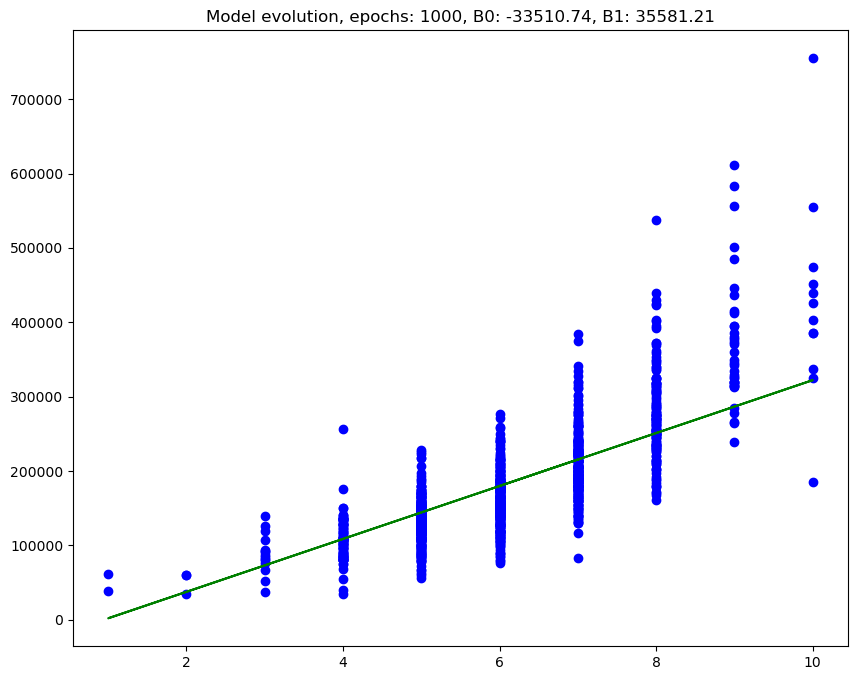

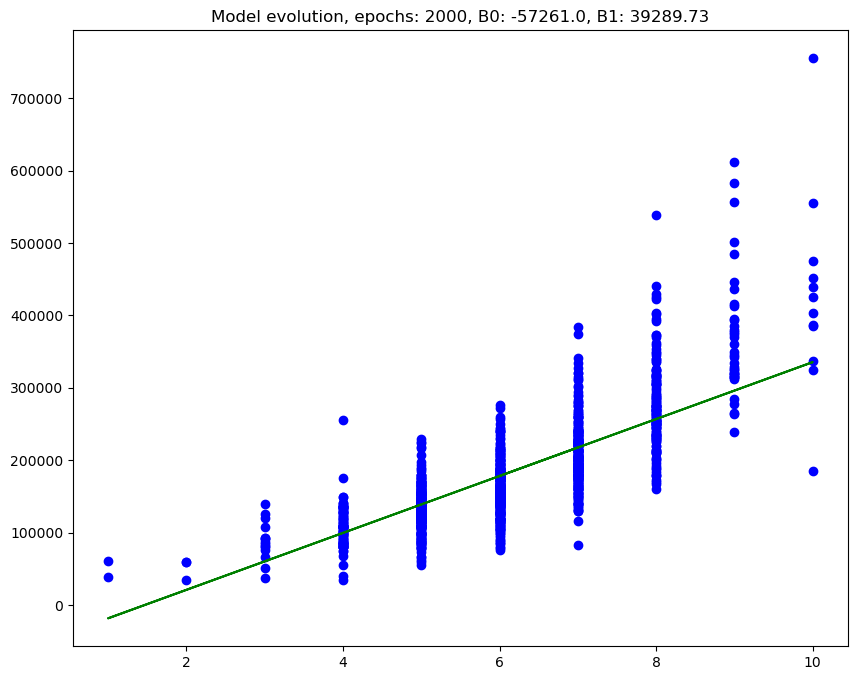

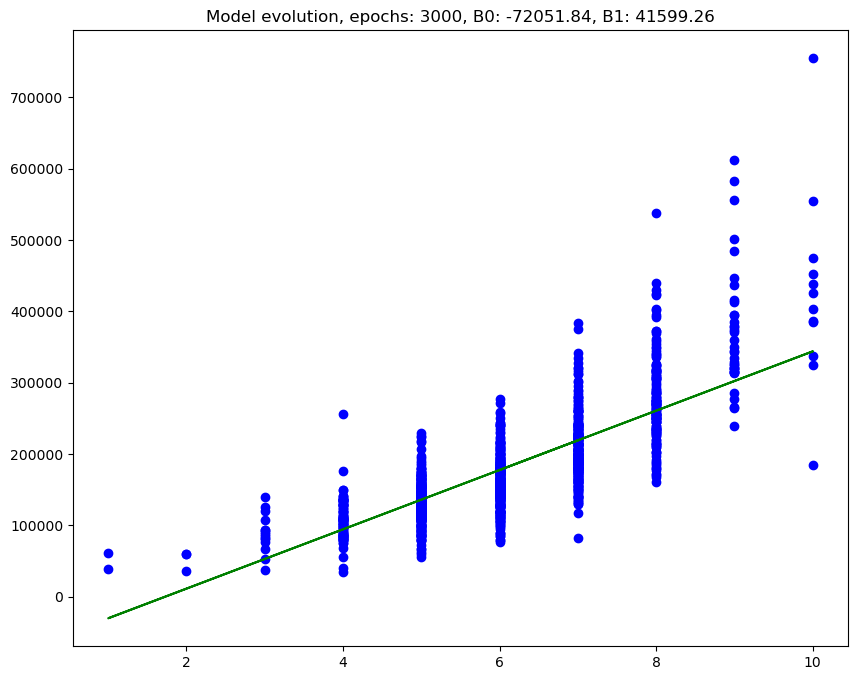

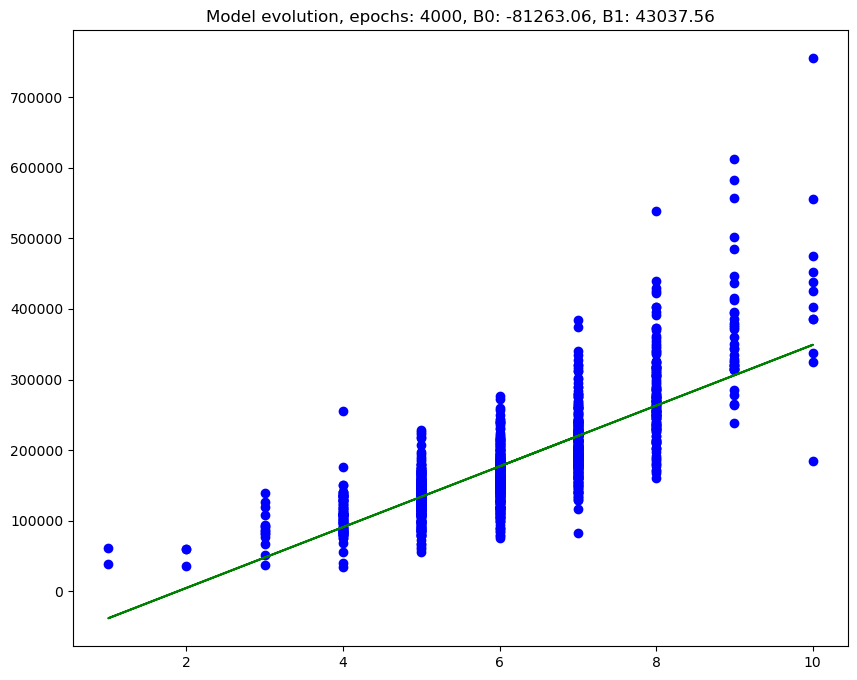

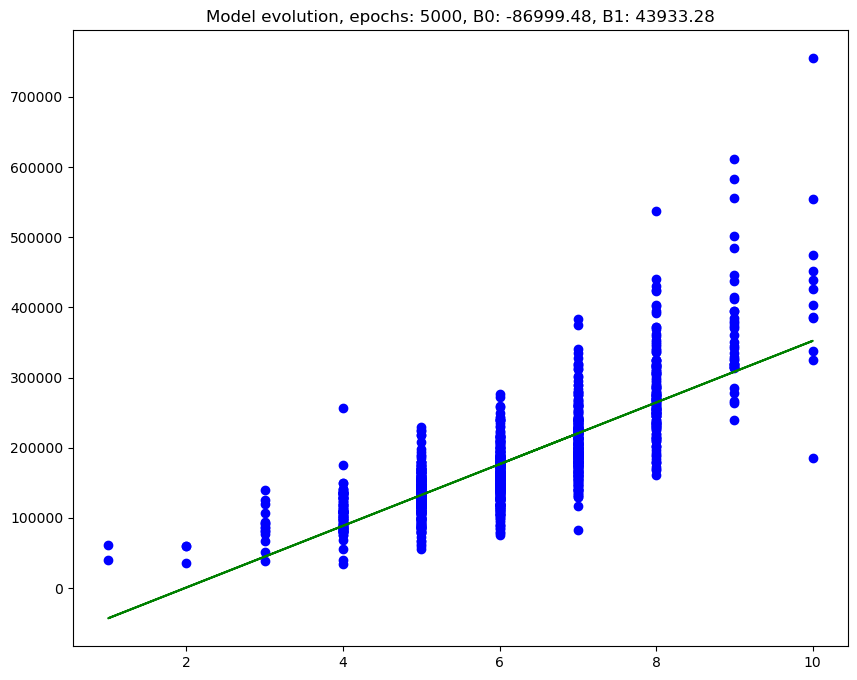

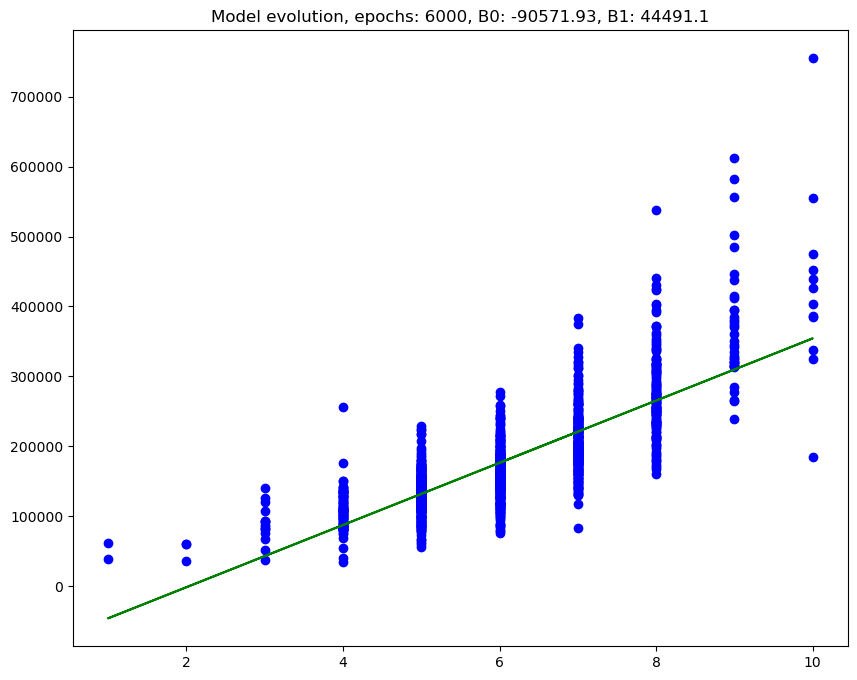

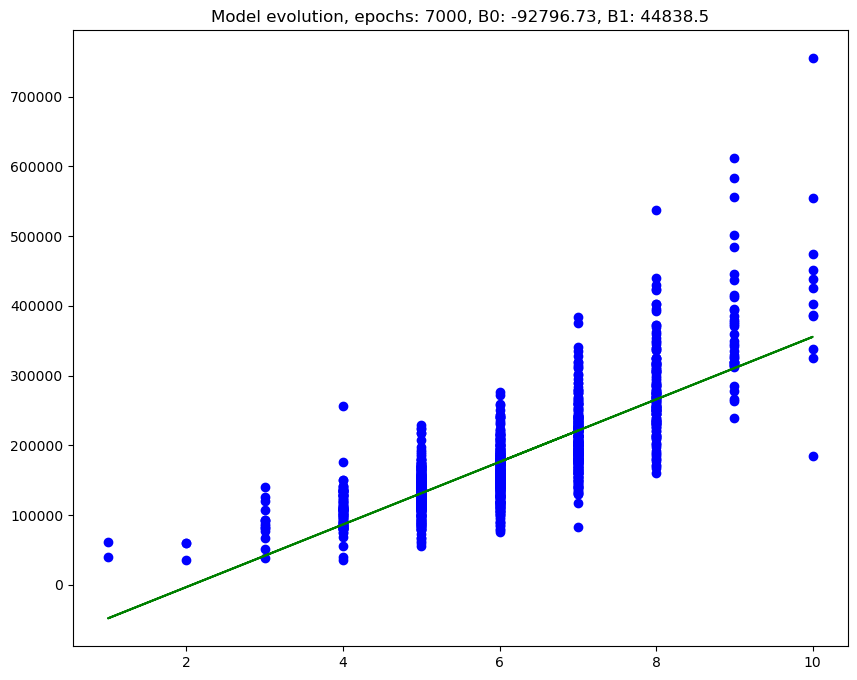

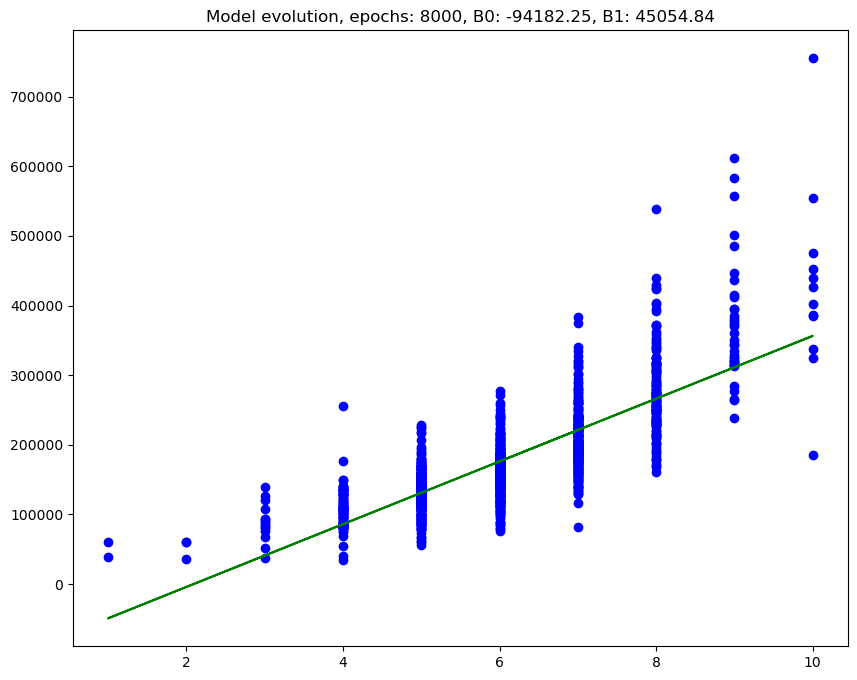

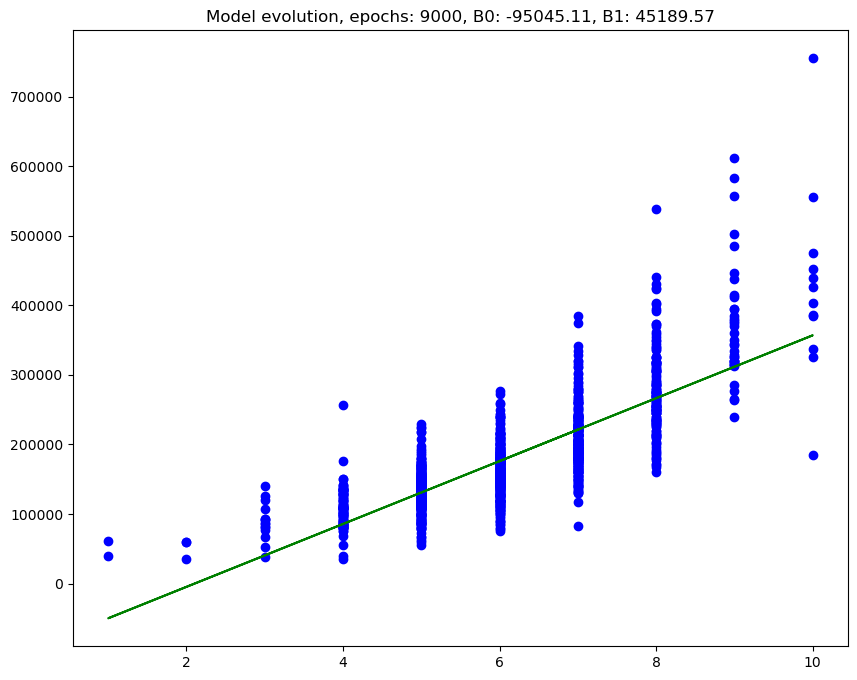

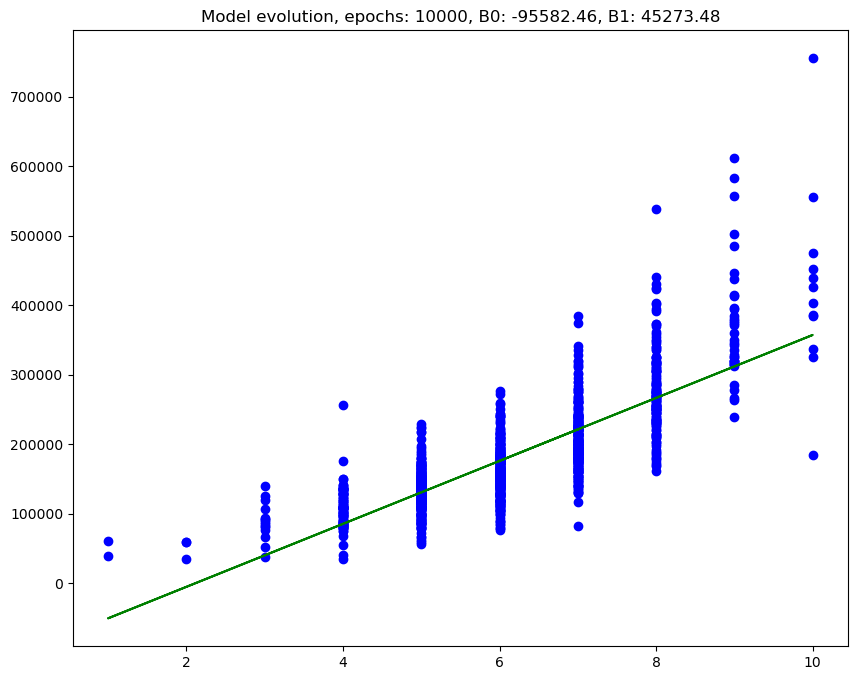

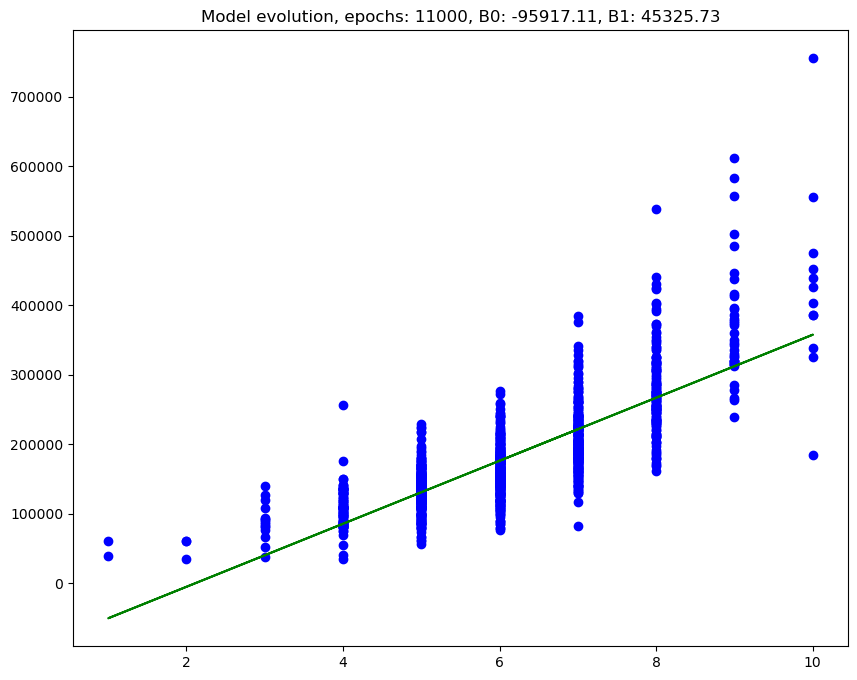

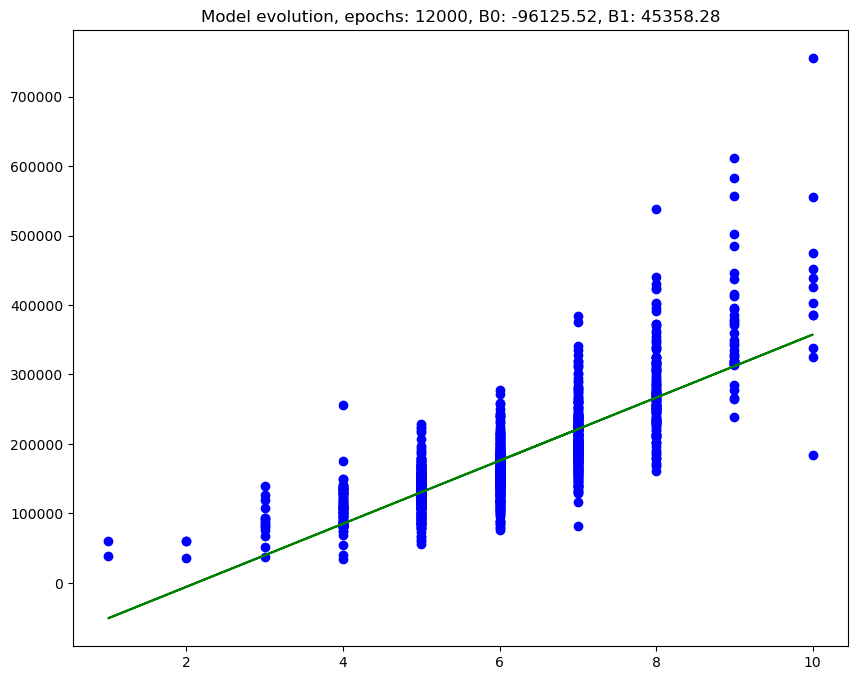

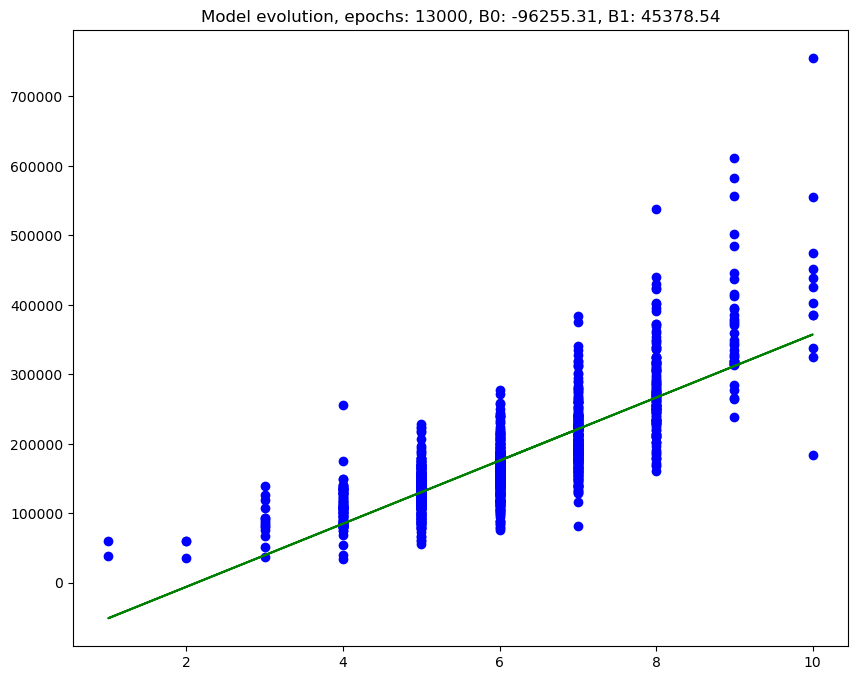

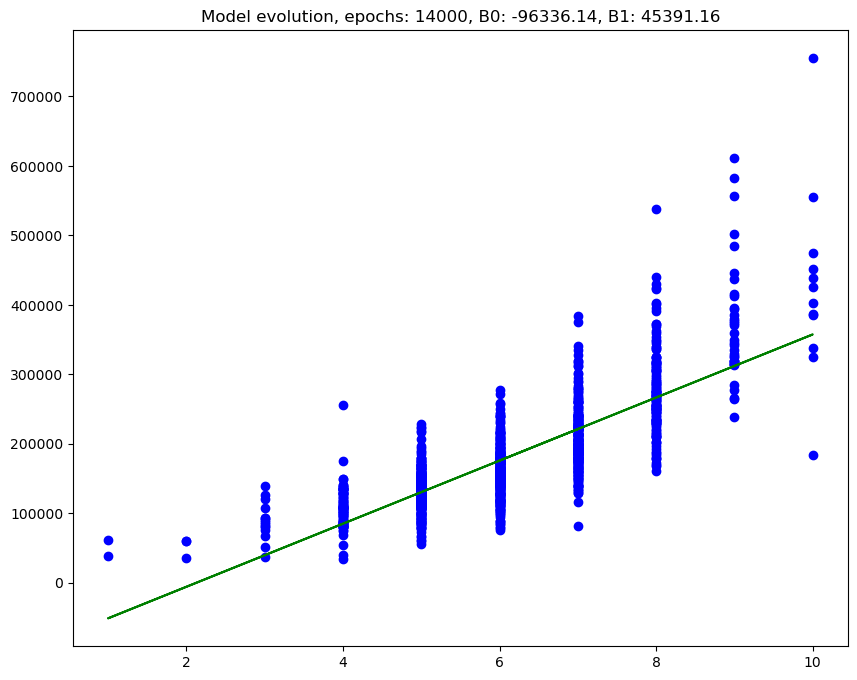

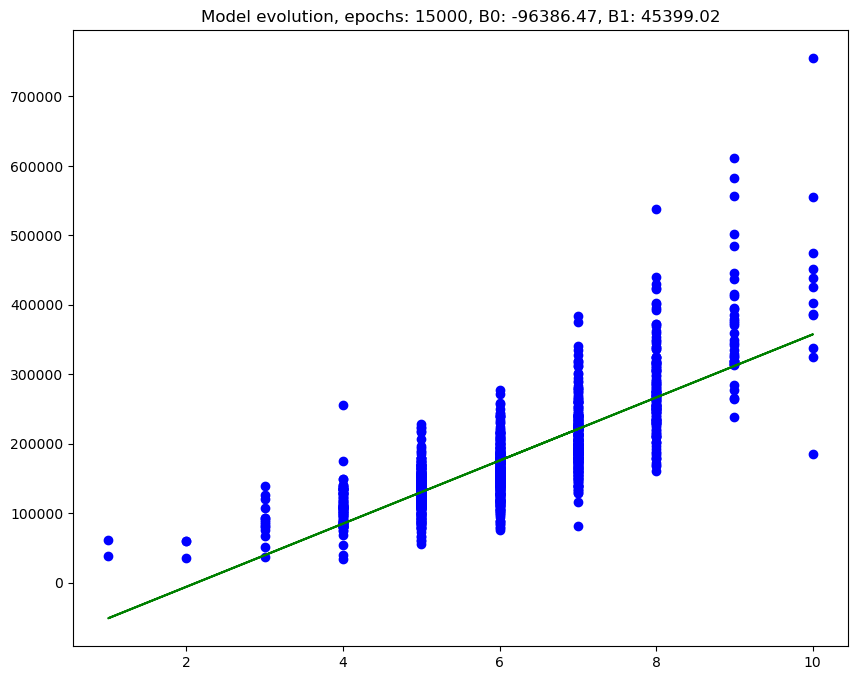

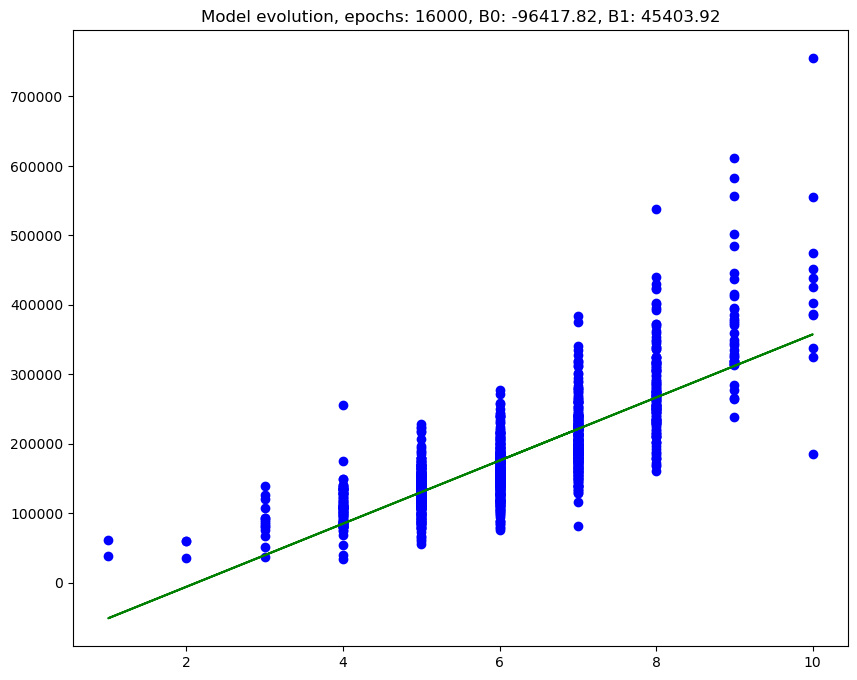

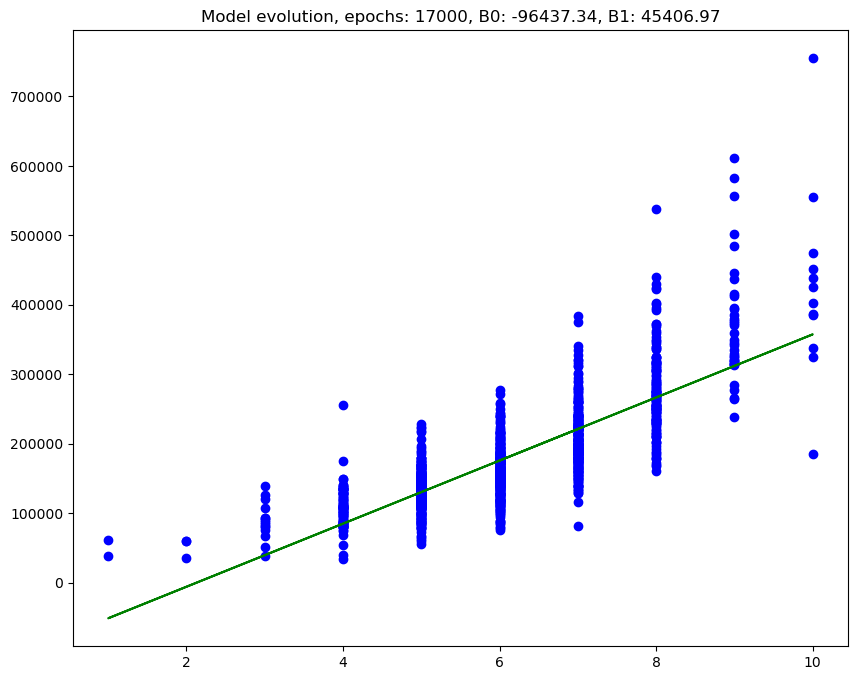

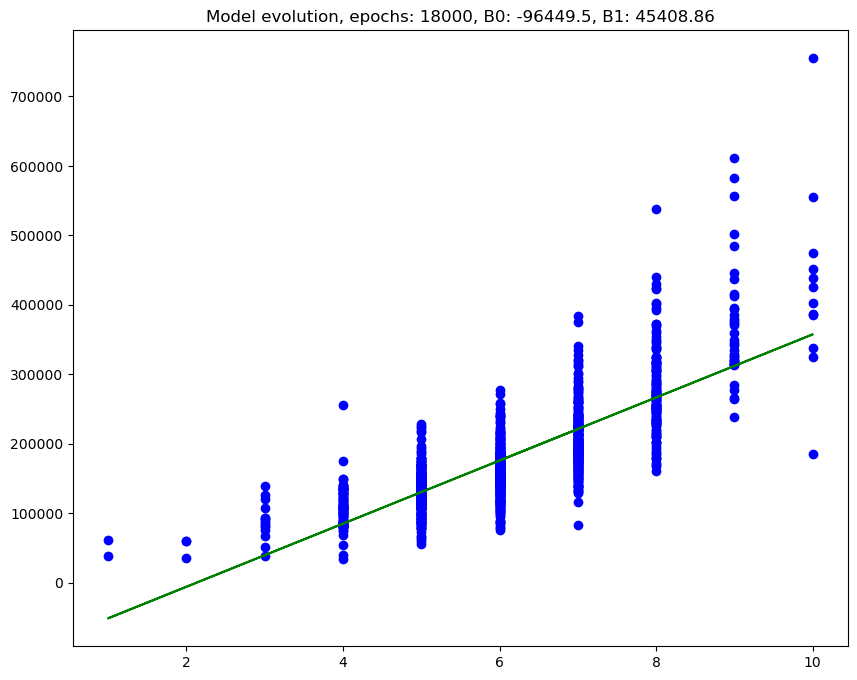

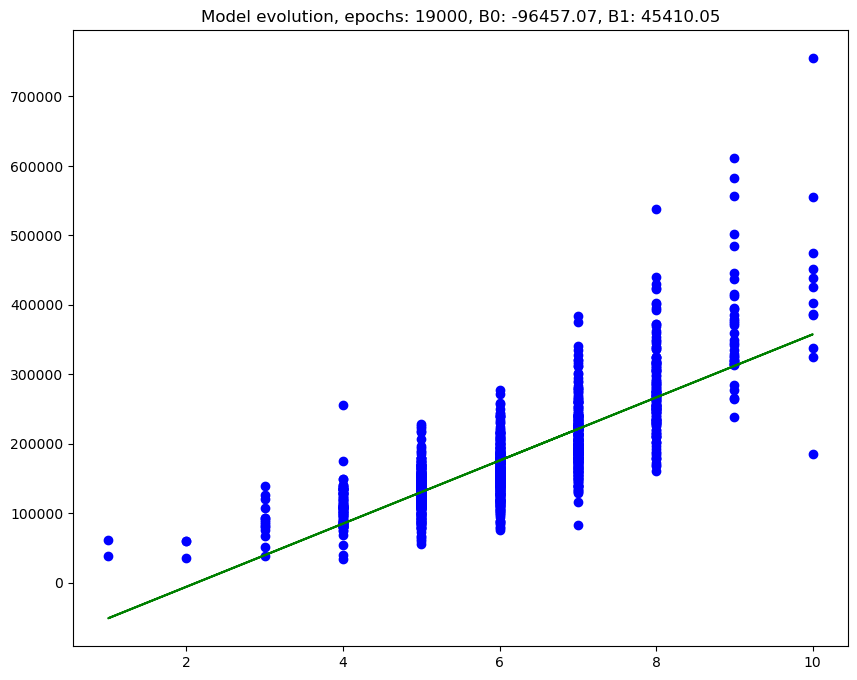

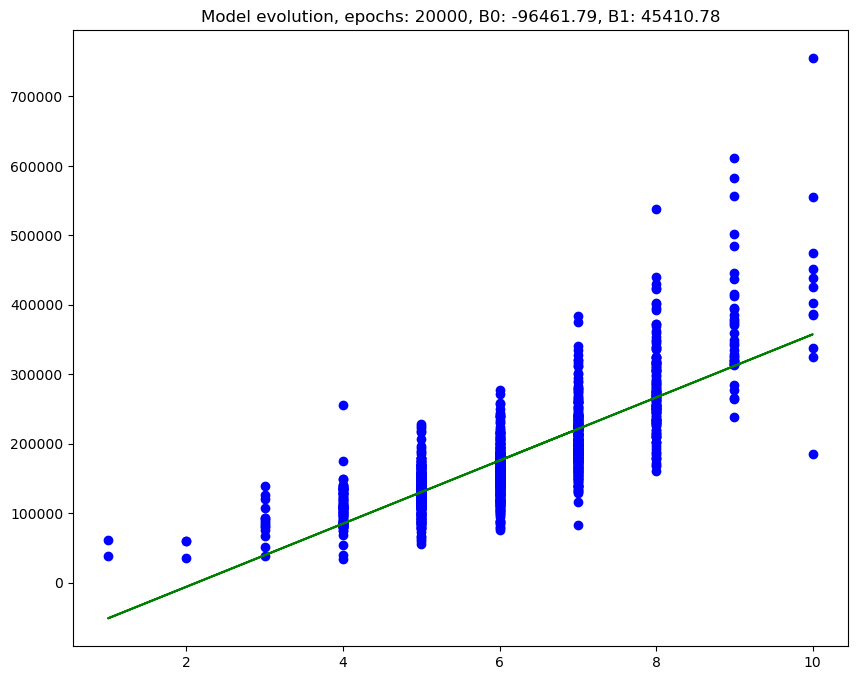

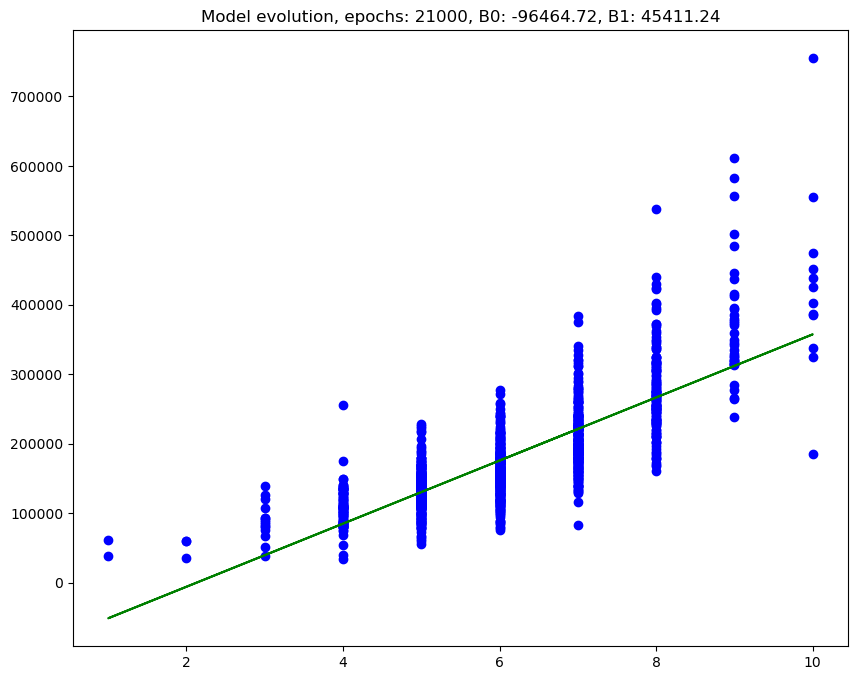

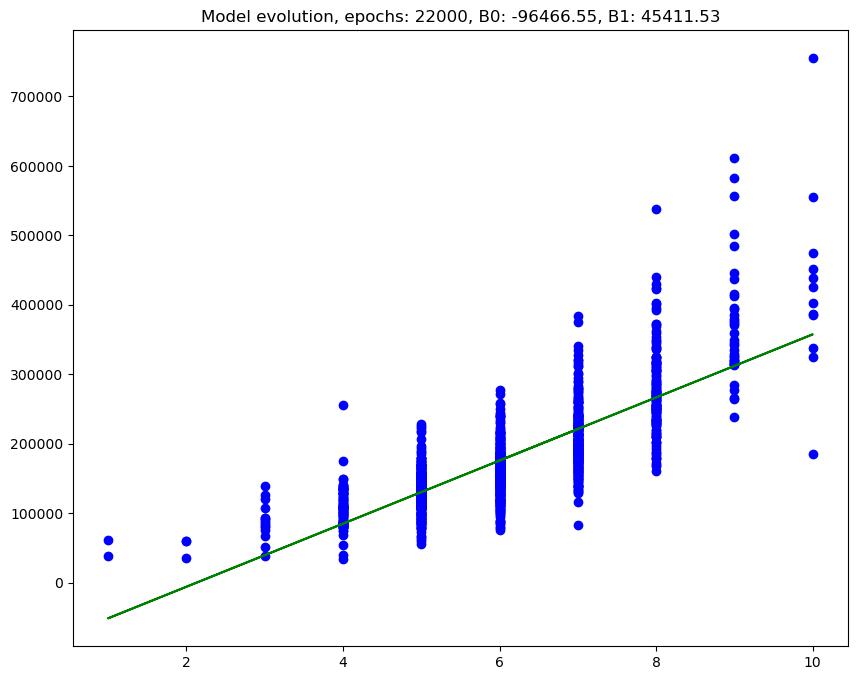

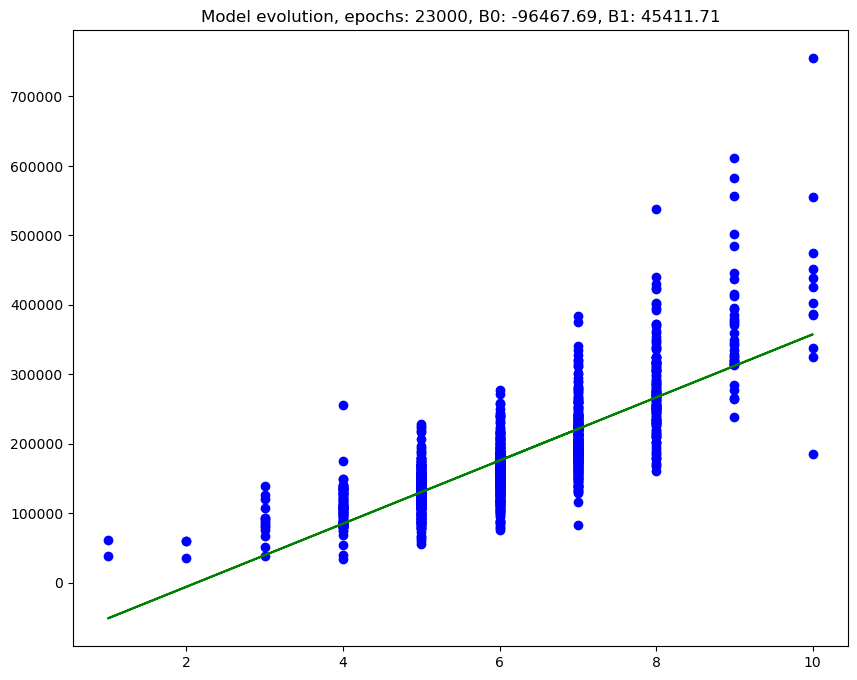

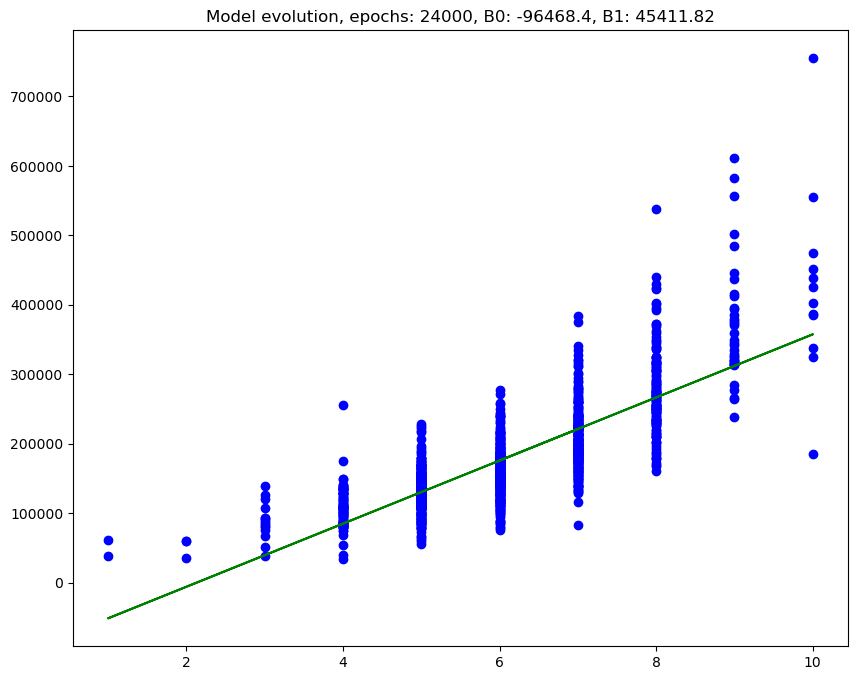

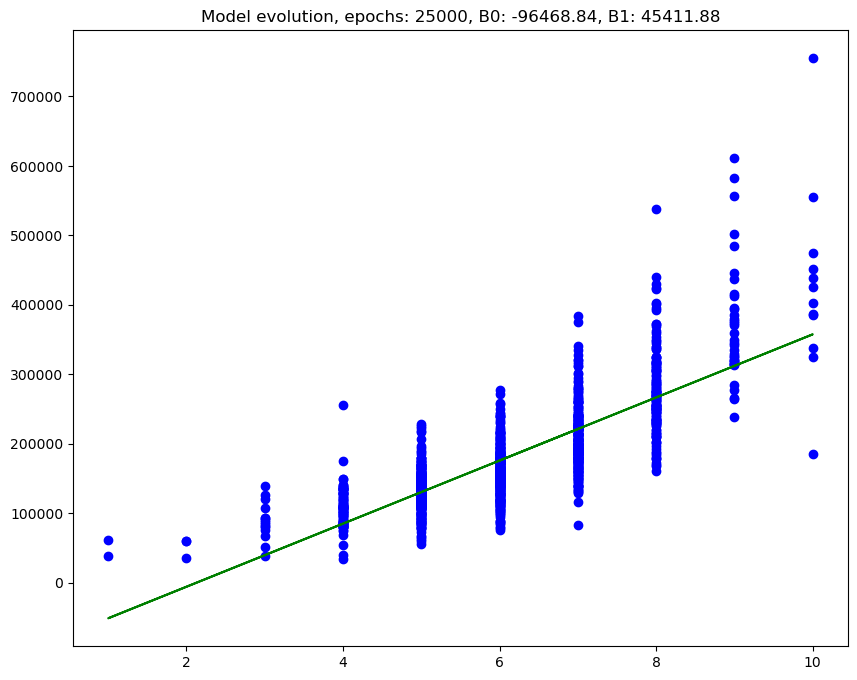

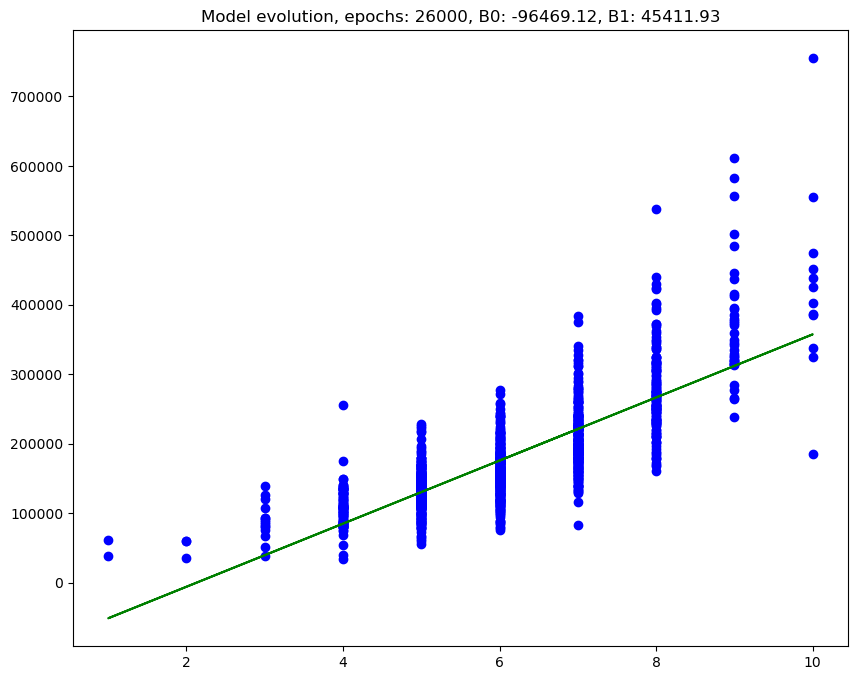

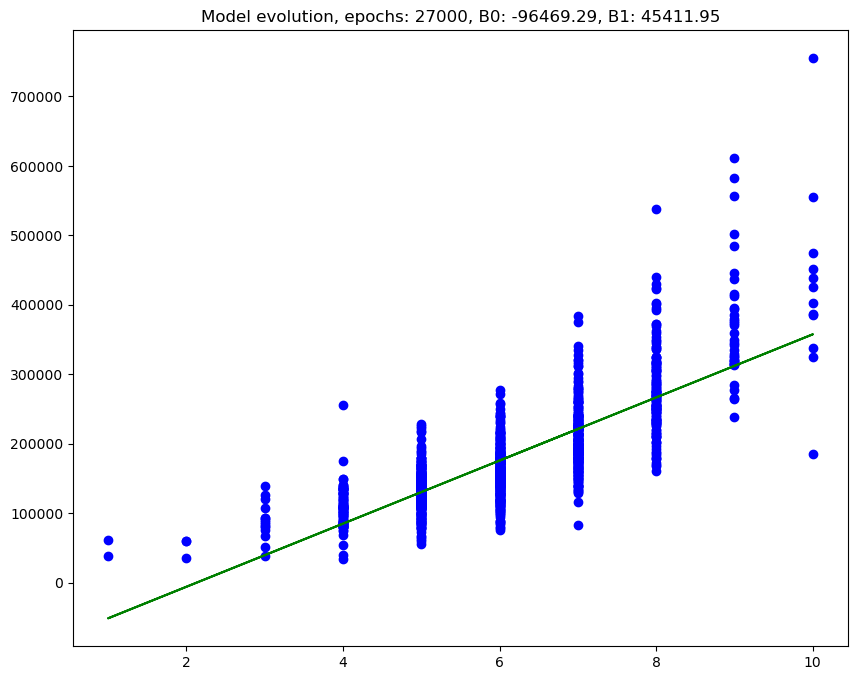

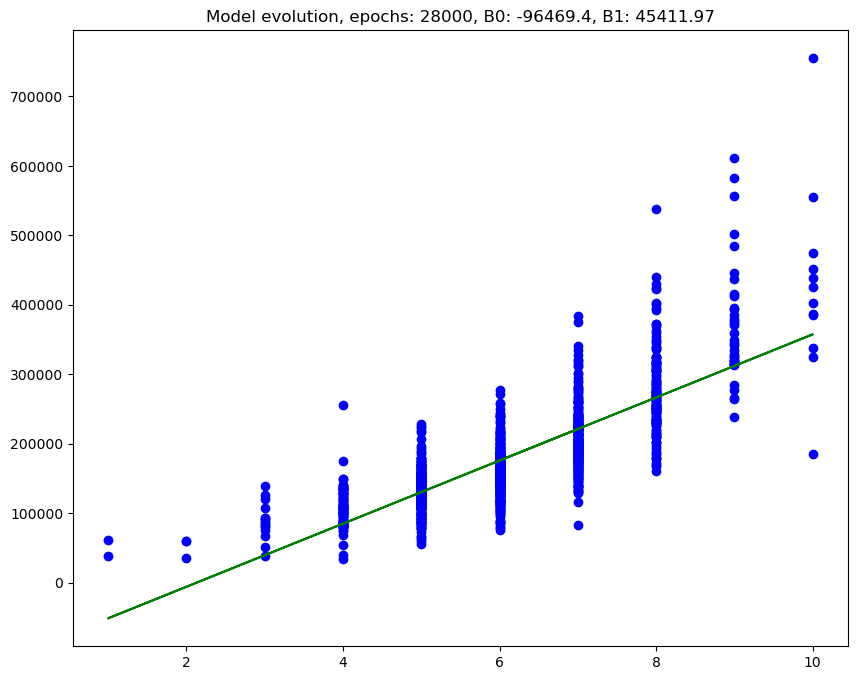

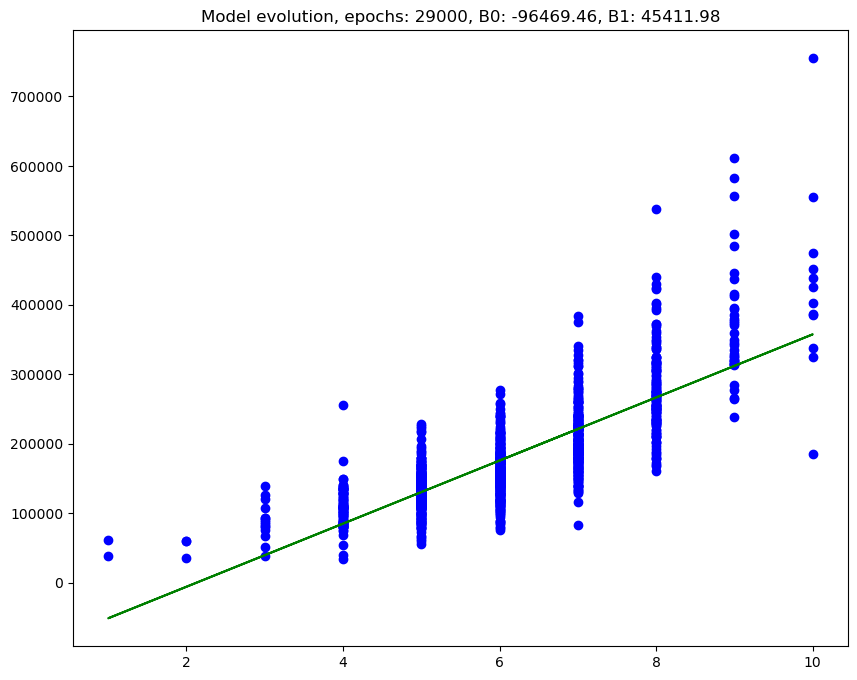

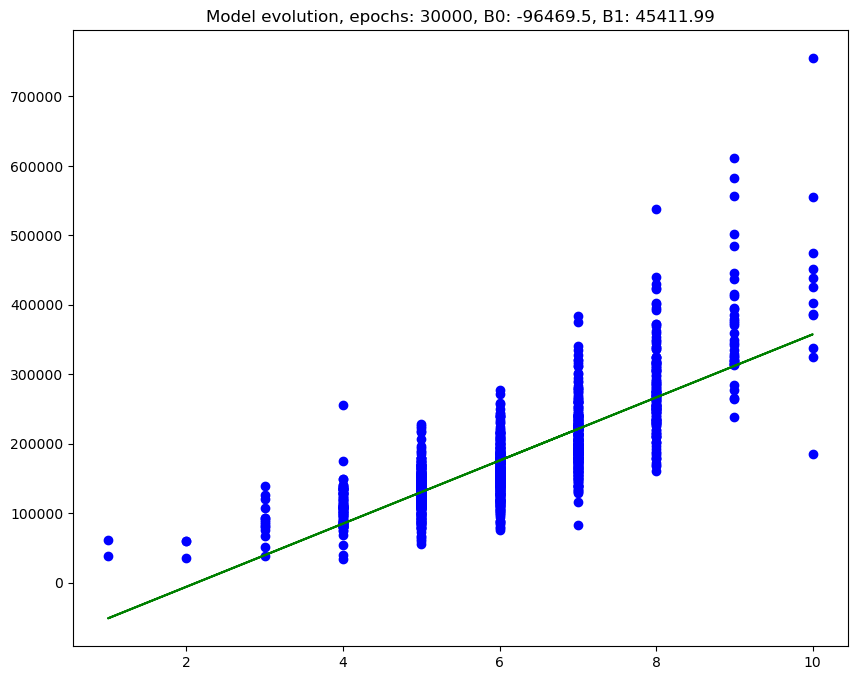

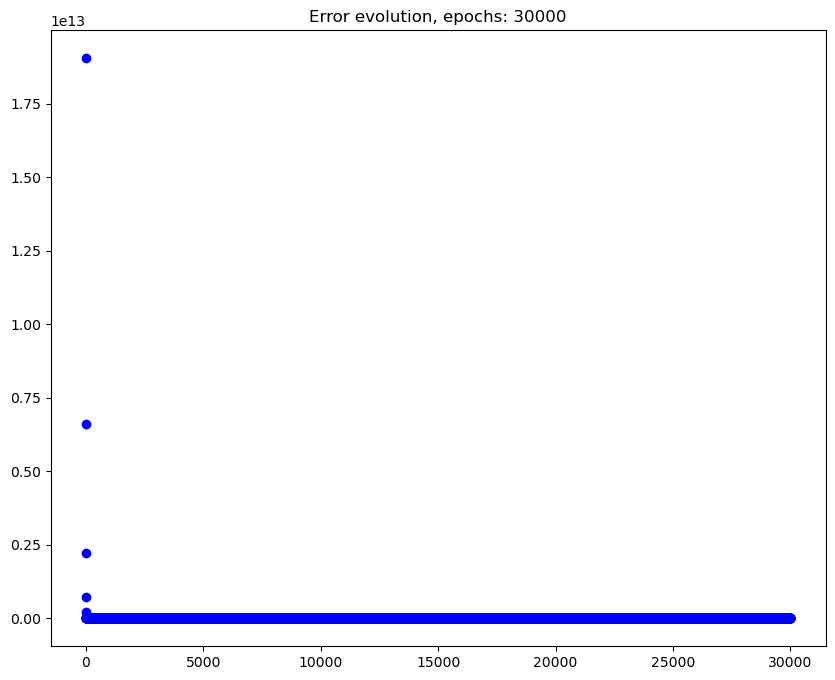

intercepts
-96469.57131874
coeficient
[45411.99877916]


'\nTrain dataset shape: (1168, 6)\nTest dataset shape: (292, 6)\nintercepts\n30324.585174963664\ncoeficient\n[129.95124229]\n'

In [12]:
data_array = np.load('proyecto_training_data.npy')
#print(data_array)
df = pd.DataFrame(data_array, columns=["SalePrice","OverallQual", "1stFlrSF","TotRmsAbvGrd","YearBuilt", "LotFrontage"])
#printDataSetInfo(df)
train_df, test_df = slicingDataSet(df)
#correlationCoefficientes(train_df)
#showScatterPlotBetweenXandY(train_df,"SalePrice")
#train_df['SalePrice'][0]

#Fisrt variable
b_data=[0,0]
dataList = linearRegresion(train_df['OverallQual'].to_numpy(),train_df['SalePrice'].to_numpy(),30000,5000,0.01,b_data)
graphTrainingModel(dataList,1000)
graphError(dataList)

reg = sckitLearningApproach(train_df['OverallQual'].to_numpy(),train_df['SalePrice'].to_numpy())

#second Varuable
#data=[0,0]
#linearRegresion(train_df['1stFlrSF'].to_numpy(),train_df['SalePrice'].to_numpy(),10,1,0.01,b_data)
#reg = sckitLearningApproach(train_df['1stFlrSF'].to_numpy(),train_df['SalePrice'].to_numpy())
"""
Train dataset shape: (1168, 6)
Test dataset shape: (292, 6)
intercepts
30324.585174963664
coeficient
[129.95124229]
"""
#OverallQual
#1stFlSF


In [ ]:
%%bash
echo "Start Script"
if [ -d ".git" ]
then
echo "We can perform the git command"
git add .
git commit -m "update notebook"
echo "Pushing data to remote server!!!"
git push
else
echo "Please add the origin after perform git commands"
fi
echo "Finish Script"